# 斐波那契数列的6种实现

斐波那契数列（Fibonacci sequence），又称黄金分割数列、因数学家列昂纳多·斐波那契（Leonardoda Fibonacci）以兔子繁殖为例子而引入，故又称为“兔子数列”，指的是这样一个数列：0、1、1、2、3、5、8、13、21、34、……在数学上，斐波纳契数列以如下被以递归的方法定义：F(0)=0, F(1)=1，F(2)=1, F(n)=F(n-1)+F(n-2)（n>=2，n∈N*）

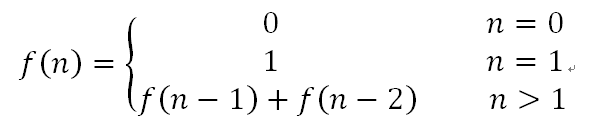

## 递归法
递归主要是在函数内部调用自己.递归实现的代码,非常容易理解,代码也非常简洁,缺点是效率较低

In [ ]:
def fab(n):
    if n==0 or n==1:
        return n
    else:
        return fab(n-1) + fab(n-2)

print fab(0), fab(1), fab(2), fab(3), fab(4), fab(5)
import time
start_time = time.time()
print fab(35)
end_time = time.time()
print end_time-start_time

## 使用序列的连接

In [29]:
def myfibs(n):
    seq = [0, 1]
    while len(seq) < n:
        seq += [seq[len(seq)-1] + seq[len(seq)-2]]    
    return seq 

print fab(0), fab(1), fab(2), fab(3), fab(4), fab(5)

0 1 1 2 3 5


## 递推法
迭代主要思想为: 循环代码中参与运算的变量同时是保存结果的变量,最常见的迭代为遍历列表

In [31]:
def fab(n):
    a, b = 0, 1
    while n > 0:
        a, b = b, a + b
        n -= 1
    return a

print fab(0), fab(1), fab(2), fab(3), fab(4), fab(5)
import time
start_time = time.time()
print fab(10000)
end_time = time.time()
print end_time-start_time

0 1 1 2 3 5
3364476487643178326662161200510754331030214846068006390656476997468008144216666236815559551363373402558206533268083615937373479048386526826304089246305643188735454436955982749160660209988418393386465273130008883026923567361313511757929743785441375213052050434770160226475831890652789085515436615958298727968298751063120057542878345321551510387081829896979161312785626503319548714021428753269818796204693609787990035096230229102636813149319527563022783762844154036058440257211433496118002309120828704608892396232883546150577658327125254609359112820392528539343462090424524892940390170623388899108584106518317336043747073790855263176432573399371287193758774689747992630583706574283016163740896917842637862421283525811282051637029808933209990570792006436742620238978311147005407499845925036063356093388383192338678305613643535189213327973290813373264265263398976392272340788292817795358057099369104917547080893184105614632233821746563732124822638309210329770164805472624384237486241145309381

这里的fibonacci函数实际上是定义了斐波拉契数列的推算规则，可以从第一个元素开始，推算出后续任意的元素，这种逻辑其实非常类似generator。而且,在每次函数运行都要保存一个列表，占内存.

## 生成器

In [ ]:
#from itertools import islice
def fab_demo4(num):
    a,b = 0, 1
    while max > 0:
        yield  a
        a, b = b, a+b
        num -= 1
for i in (fab_demo4(5)):#fab(1), fab(2), fab(3), fab(4), fab(5)
    print i

#fbn = [i fo i in fab_demo4(5)]
# import time
# start_time = time.time()
# print fab(35)
# end_time = time.time()
# print end_time-start_time

带有yield的函数都被看成生成器，生成器是可迭代对象，且具备__iter__ 和 __next__方法， 可以遍历获取元素

## 类实现内部魔法方法

In [22]:
class Fibonacci(object):

    def __init__(self, num):
        self.num = num

    def __iter__(self):
        if self.num < 1:
            yield 1
        a, b = 0, 1
        while self.num > 0:
            yield a
            a, b = b, a + b
            self.num -= 1
    def __next__(self):
        return self.__iter__()

f = Fibonacci(5)
for i in f:
    print(i)

0
1
1
2
3


## 修饰符法

In [24]:
def cache(func):
    cached = {}
    def _func(args):
        if args not in cached:
            cached[args] = func(args)
        return cached[args]
    
    return _func

@cache
def fab(n):
    if n==0 or n==1:
        return n
    else:
        return fab(n-1) + fab(n-2)

print fab(0), fab(1), fab(2), fab(3), fab(4), fab(5)
import time
start_time = time.time()
print fab(100)
end_time = time.time()
print end_time-start_time

0 1 1 2 3 5
354224848179261915075
0.0


## 矩阵法

《线性代数》是大学计算机专业低年级的课程，这门课教的就是矩阵，那时候觉得这东西学起来很枯燥，没什么用处，工作后你才发现搞机器学习、数据分析、数据建模时大有用处，书到用时方恨少。其实矩阵的本质就是线性方程式。

斐波那契数列中两个相邻的项分别为：F(n) 和 F(n - 1)，如果把这两个数当作一个2行1列的矩阵可表示为：

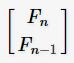




因为 F(n) = F(n-1)+F(n-2)，所以就有：
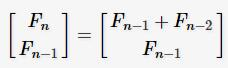


通过反推，其实它是两个矩阵的乘积得来的
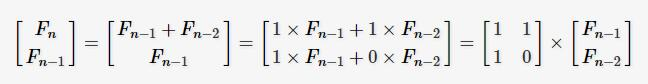


依此类推：
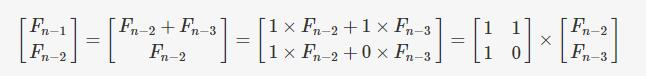

最后可推出：
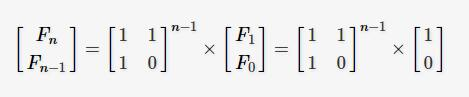

因此想要求出F(n)的值，只要能求出右边矩阵的n-1次方的值，最后求得两矩阵乘积，取新矩阵的第一行的第一列的值即可，比如n=3时，
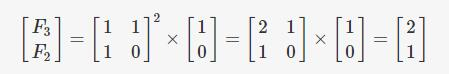

In [20]:
import numpy

def fab(n):
    return (numpy.matrix([[1, 1], [1, 0]]) ** (n - 1) * numpy.matrix([[1], [0]]))[0, 0]

print fab(0), fab(1), fab(2), fab(3), fab(4), fab(5)
import time
start_time = time.time()
print fab(10000)
end_time = time.time()
print end_time-start_time


0.0 1 1 2 3 5
1242044891
0.00100016593933


- https://www.ted.com/talks/arthur_benjamin_the_magic_of_fibonacci_numbers?language=zh-cn#t-364274
- https://www.zhihu.com/question/28062458
- https://www.nayuki.io/page/fast-fibonacci-algorithms
- http://www.ruanyifeng.com/blog/2015/09/matrix-multiplication.html
- https://foofish.net/daily-question4.html